
# Weather Forecast System
### **Creator: Qurat Ul Ain**

The Weather Prediction System is a Python project that aims to predict weather conditions based on historical weather data. It utilizes machine learning algorithms to analyze patterns and relationships within the data and make predictions about future weather conditions.

Project Description:
The Weather Prediction System project involves the following key steps:

    Data Preprocessing: Cleaning the collected data, handling missing values, and performing necessary data transformations.

    Model Selection: Choosing an appropriate machine learning algorithm for weather prediction. This can include regression models, time series analysis, or ensemble methods like Random Forest or Gradient Boosting.

    Model Training: Splitting the data into training and testing sets. The training set is used to train the chosen model using the historical weather data, while the testing set is used to evaluate the model's performance.

    Model Evaluation: Assessing the accuracy and performance of the trained model using evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or coefficient of determination (R-squared).


## Importing required Libraries

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, timedelta, datetime



## Data Collection

In [427]:
def collect_data():
  data= pd.read_csv('J:/datasets/disaster/weather/weatherHistory.csv')
  data.columns= data.columns.str.replace(' ', '_')
  return data	

In [428]:
data= collect_data()
data.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted_Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip_Type               95936 non-null  object 
 3   Temperature_(C)           96453 non-null  float64
 4   Apparent_Temperature_(C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind_Speed_(km/h)         96453 non-null  float64
 7   Wind_Bearing_(degrees)    96453 non-null  float64
 8   Visibility_(km)           96453 non-null  float64
 9   Loud_Cover                96453 non-null  float64
 10  Pressure_(millibars)      96453 non-null  float64
 11  Daily_Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Data Cleaning and Preprocessing

In [430]:
data.shape

(96453, 12)

In [431]:
data.describe()

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [432]:
data.keys()

Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature_(C)',
       'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
       'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Loud_Cover',
       'Pressure_(millibars)', 'Daily_Summary'],
      dtype='object')

In [433]:
data['Formatted_Date']=pd.to_datetime(data['Formatted_Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True).dt.date
data[['Date']] = data[['Formatted_Date']].apply( lambda x: pd.to_datetime(x, format='%Y-%m-%d').dt.date)
print ('After  converting : ' ,data['Date'].dtypes)

After  converting :  object


In [434]:
data['Date']=pd.to_datetime(data['Date'], format='%Y-%m-%d')
print ('After  converting : ' ,data['Date'].dtypes)

After  converting :  datetime64[ns]


In [435]:
data.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary,Date
0,2006-03-31,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31
1,2006-03-31,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01


In [436]:
data['Month'] = data['Date'].dt.month_name()
data['Month_Number'] = data['Date'].dt.month
data['Month']

0            March
1            March
2            April
3            April
4            April
           ...    
96448    September
96449    September
96450    September
96451    September
96452    September
Name: Month, Length: 96453, dtype: object

In [437]:
# Sort values by month number
data = data.sort_values('Month_Number')

# Print the 'Month' column
print(data['Month'])

82486     January
20658     January
20657     January
20656     January
20655     January
           ...   
89657    December
89658    December
89659    December
89661    December
10945    December
Name: Month, Length: 96453, dtype: object


In [438]:
""""ata['Formatted_Date']=pd.to_datetime(data['Formatted_Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True).dt.date

# Convert datetime to Europe/Paris'
data['Formatted_Date'] = data['Formatted_Date'].dt.tz_convert('Europe/Paris')

# Reduce the datetime format to '%Y-%m-%d' using strftime
data['Formatted_Date'] = data['Formatted_Date'].dt.strftime('%Y-%m-%d')

# Print the resulting DataFrame
data.head()
"""


'"ata[\'Formatted_Date\']=pd.to_datetime(data[\'Formatted_Date\'], format=\'%Y-%m-%d %H:%M:%S%z\', utc=True).dt.date\n\n# Convert datetime to Europe/Paris\'\ndata[\'Formatted_Date\'] = data[\'Formatted_Date\'].dt.tz_convert(\'Europe/Paris\')\n\n# Reduce the datetime format to \'%Y-%m-%d\' using strftime\ndata[\'Formatted_Date\'] = data[\'Formatted_Date\'].dt.strftime(\'%Y-%m-%d\')\n\n# Print the resulting DataFrame\ndata.head()\n'

### Droping unnecessary columns

In [439]:
data.drop([ 'Wind_Bearing_(degrees)','Loud_Cover','Daily_Summary','Formatted_Date'],axis=1,inplace=True)

In [440]:
data.head()

,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Visibility_(km),Pressure_(millibars),Date,Month,Month_Number
82486,Overcast,snow,-6.650000,-9.938889,0.76,6.6010,14.9569,1036.74,2015-01-08,January,1
20658,Overcast,rain,5.900000,3.916667,0.78,9.2253,11.0446,1020.27,2008-01-17,January,1
20657,Overcast,rain,5.972222,5.972222,0.77,4.7978,9.9015,1019.75,2008-01-17,January,1
20656,Overcast,rain,6.894444,5.066667,0.75,9.3702,9.9820,1019.42,2008-01-17,January,1
20655,Overcast,rain,7.644444,5.261111,0.72,13.3630,9.9820,1018.97,2008-01-17,January,1


In [441]:
data_numerics = data.select_dtypes(include=np.number)
data_cat = set(data.columns) - set(data_numerics)
print("Numeric Columns:\n",list(data_numerics))
print("Categorical Columns:\n",data_cat)

Numeric Columns:
 ['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 'Visibility_(km)', 'Pressure_(millibars)', 'Month_Number']
Categorical Columns:
 {'Summary', 'Precip_Type', 'Date', 'Month'}


### Finding missing values

In [442]:
print('Missing value: ------------- ')
print(data.isnull().sum())

Missing value: ------------- 
Summary                       0
Precip_Type                 517
Temperature_(C)               0
Apparent_Temperature_(C)      0
Humidity                      0
Wind_Speed_(km/h)             0
Visibility_(km)               0
Pressure_(millibars)          0
Date                          0
Month                         0
Month_Number                  0
dtype: int64


    missing value found in Precip_Type!

In [443]:
data['Precip_Type'].value_counts()

rain    85224
snow    10712
Name: Precip_Type, dtype: int64

In [444]:
# Fill NaN values in 'Precip_Type                 
data['Precip_Type'].fillna('unknown', inplace=True)

data.head(5)

,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Visibility_(km),Pressure_(millibars),Date,Month,Month_Number
82486,Overcast,snow,-6.650000,-9.938889,0.76,6.6010,14.9569,1036.74,2015-01-08,January,1
20658,Overcast,rain,5.900000,3.916667,0.78,9.2253,11.0446,1020.27,2008-01-17,January,1
20657,Overcast,rain,5.972222,5.972222,0.77,4.7978,9.9015,1019.75,2008-01-17,January,1
20656,Overcast,rain,6.894444,5.066667,0.75,9.3702,9.9820,1019.42,2008-01-17,January,1
20655,Overcast,rain,7.644444,5.261111,0.72,13.3630,9.9820,1018.97,2008-01-17,January,1


### Droping unnecessary columns

In [445]:
print(data.shape)

(96453, 11)


## Exploratory  Data Analysis

### Summary of Weather Data

In [446]:
avg_Apparent_Temperature = round(data["Apparent_Temperature_(C)"].mean(),1)
print('\n'"avg_Apparent_Temperature: ",avg_Apparent_Temperature )
avg_Temperature = round(data["Temperature_(C)"].mean(),1)
print('\n'"avg_Temperature: ",avg_Temperature )
avg_Humidity = round(data["Humidity"].mean(),1)
print('\n'"avg_Humidity: ",avg_Humidity )
avg_Wind_Speed = round(data["Wind_Speed_(km/h)"].mean(),1)
print('\n'"avg_Wind_Speed: ",avg_Wind_Speed )



avg_Apparent_Temperature:  10.9

avg_Temperature:  11.9

avg_Humidity:  0.7

avg_Wind_Speed:  10.8


In [447]:
# Create a new dataframe which contains the total sale for each date

tot_sales = pd.pivot_table(data, values = 'Humidity', index = 'Date', aggfunc = 'sum')
tot_sales.head()

,Humidity
Date,
2005-12-31,0.89
2006-01-01,19.61
2006-01-02,20.33
2006-01-03,21.53
2006-01-04,21.76


### What is humidity level with every precip type during each month?

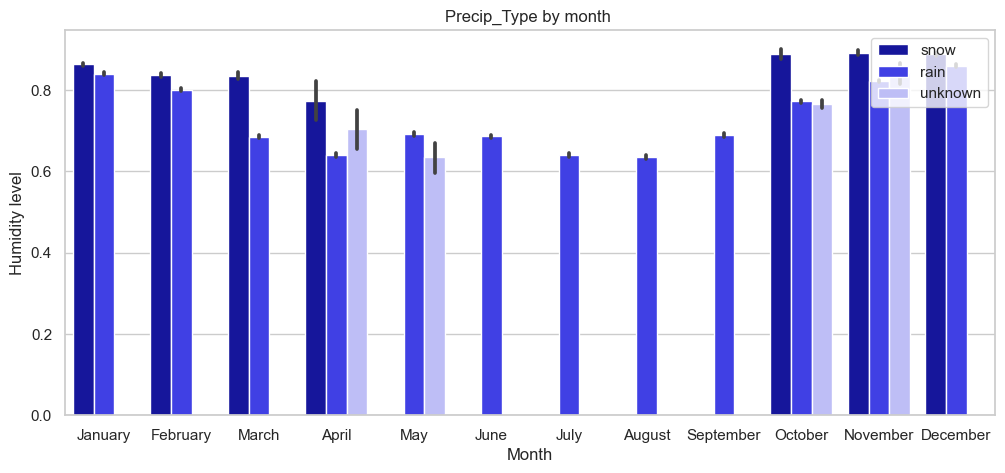

In [448]:

sns.set_theme(style="whitegrid", palette="seismic")
plt.figure(figsize=(12,5))

sns.barplot(x='Month', y='Humidity', hue='Precip_Type', data=data)

# Set the title and axes labels
plt.title('Precip_Type by month ')
plt.xlabel('Month')
plt.ylabel('Humidity level')
plt.legend(loc='upper right')
# Show the plot
plt.show()

### What is the humidity level during each month??

Month      Month_Number
April      4               0.641051
August     8               0.635300
December   12              0.870398
February   2               0.813407
January    1               0.850698
July       7               0.639593
June       6               0.686418
March      3               0.702849
May        5               0.691650
November   11              0.827917
October    10              0.774443
September  9               0.689163
Name: Humidity, dtype: float64


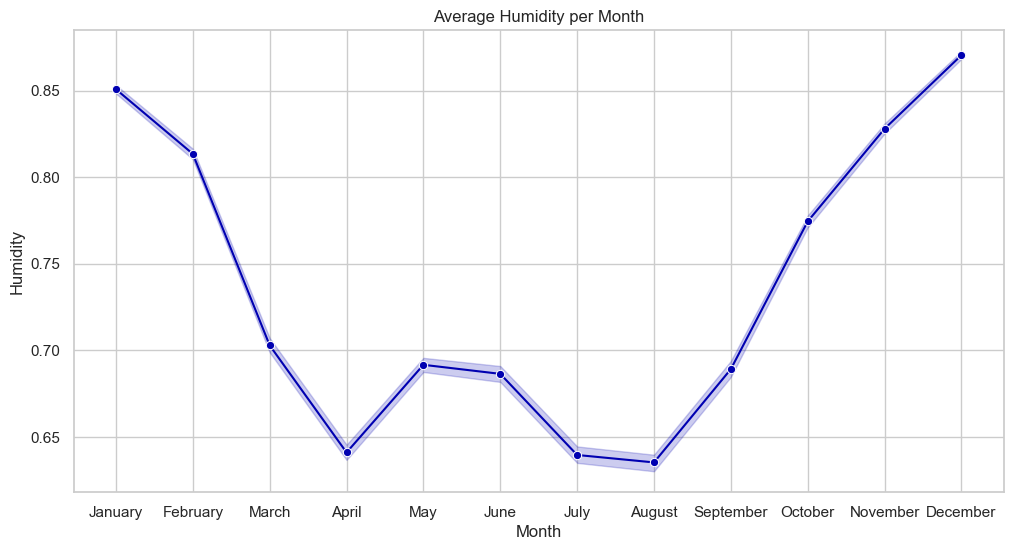

In [449]:
Humidity_per_mnth =data.groupby(by=["Month","Month_Number"])["Humidity"].mean(numeric_only=True)
print(Humidity_per_mnth)
sns.set_theme(style="whitegrid", palette="seismic")
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Month' , y = 'Humidity' , data = data, linestyle='-', marker ='o')

plt.xlabel("Month")
plt.ylabel("Humidity")
plt.title("Average Humidity per Month")
plt.show()

    December has top  humidity level

### What is Average Temprature per month?

Month      Month_Number
April      4               12.769200
August     8               22.339134
December   12               1.625086
February   2                2.166880
January    1                0.815678
July       7               22.965462
June       6               20.728510
March      3                6.914976
May        5               16.874455
November   11               6.587549
October    10              11.334119
September  9               17.503458
Name: Temperature_(C), dtype: float64


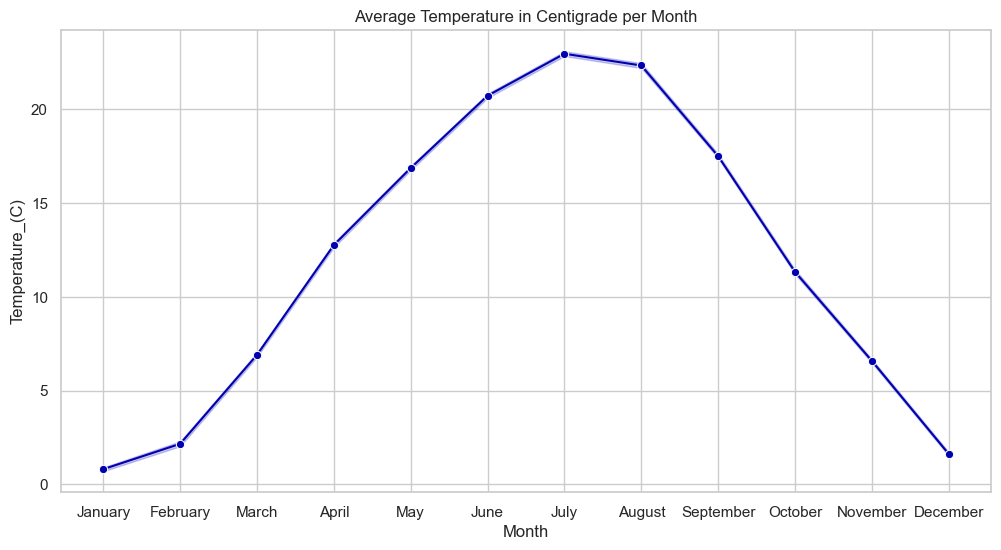

In [450]:
Humidity_per_mnth =data.groupby(by=["Month","Month_Number"])["Temperature_(C)"].mean(numeric_only=True)
print(Humidity_per_mnth)
sns.set_theme(style="whitegrid", palette="seismic")
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Month' , y = 'Temperature_(C)' , data = data, linestyle='-', marker ='o')

plt.xlabel("Month")
plt.ylabel("Temperature_(C)")
plt.title("Average Temperature in Centigrade per Month")
plt.show()

### What is Average Wind during each month?

Month      Month_Number
April      4               11.876139
August     8                8.942707
December   12              11.094578
February   2               12.180815
January    1               11.515865
July       7                9.637124
June       6                9.632453
March      3               13.415825
May        5               10.953186
November   11              10.947953
October    10              10.008495
September  9                9.610204
Name: Wind_Speed_(km/h), dtype: float64


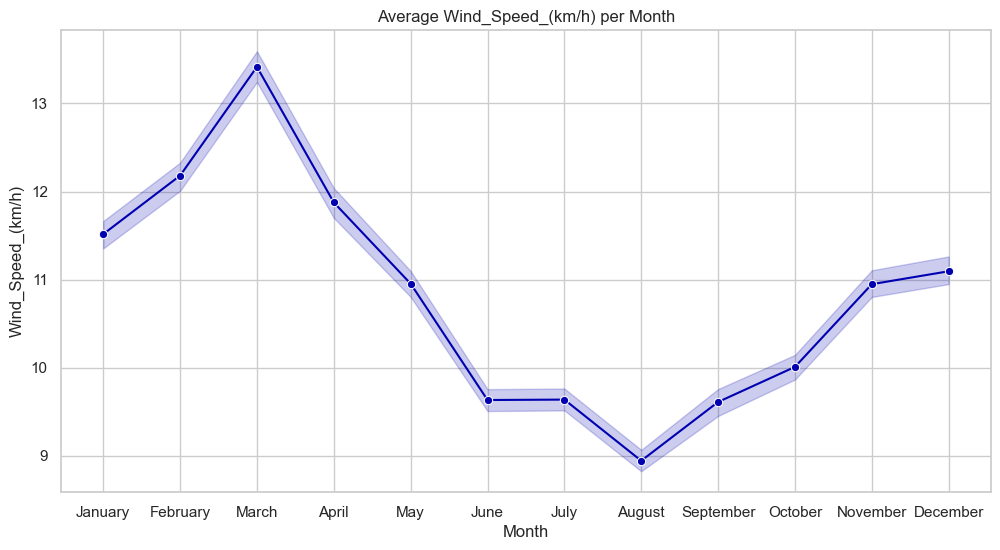

In [451]:
Humidity_per_mnth =data.groupby(by=["Month","Month_Number"])["Wind_Speed_(km/h)"].mean(numeric_only=True)
print(Humidity_per_mnth)
sns.set_theme(style="whitegrid", palette="seismic")
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Month' , y = 'Wind_Speed_(km/h)' , data = data, linestyle='-', marker ='o')

plt.xlabel("Month")
plt.ylabel("Wind_Speed_(km/h)")
plt.title("Average Wind_Speed_(km/h) per Month")
plt.show()

### What is Pressure_(millibars) during each month?

Month      Month_Number
April      4               1009.995154
August     8               1001.470591
December   12               985.781311
February   2               1003.925126
January    1               1006.245222
July       7               1008.562854
June       6               1002.019582
March      3               1001.564999
May        5               1003.376970
November   11              1012.420129
October    10              1003.099488
September  9               1000.835433
Name: Pressure_(millibars), dtype: float64


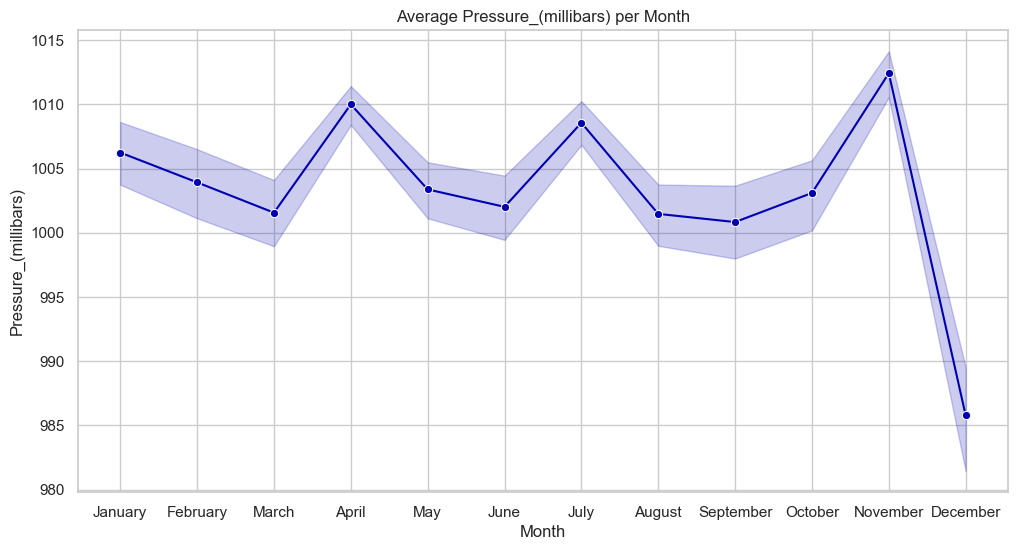

In [452]:
Humidity_per_mnth =data.groupby(by=["Month","Month_Number"])["Pressure_(millibars)"].mean(numeric_only=True)
print(Humidity_per_mnth)
sns.set_theme(style="whitegrid", palette="seismic")
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Month' , y = 'Pressure_(millibars)' , data = data, linestyle='-', marker ='o')

plt.xlabel("Month")
plt.ylabel("Pressure_(millibars)")
plt.title("Average Pressure_(millibars) per Month")
plt.show()